# Queues


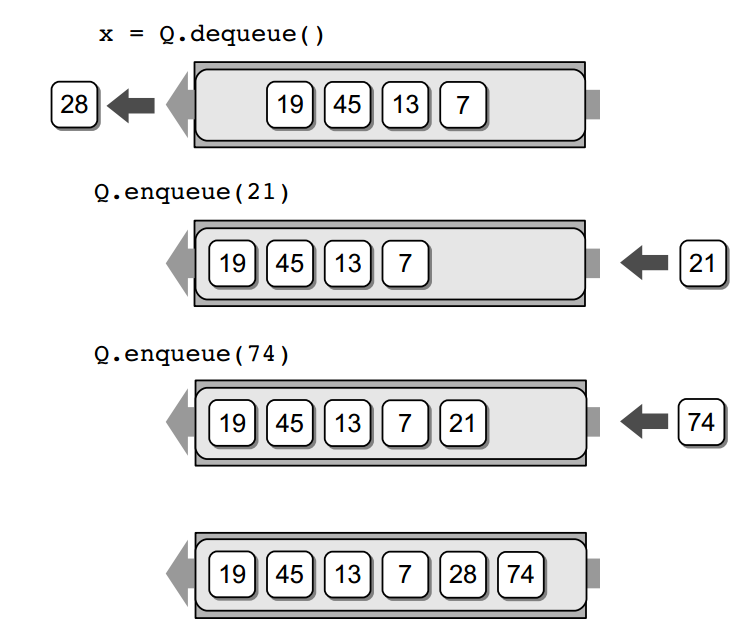

In [8]:
# Implementing the queue using Python list

# Implementation of the Queue ADT using a Python list.
class Queue :
     # Creates an empty queue.
     def __init__( self ):
         self._qList = list() 
         # Returns True if the queue is empty.
     
     def isEmpty( self ):
         return len( self ) == 0

     # Returns the number of items in the queue.
     def __len__( self ):
         return len( self._qList )

     # Adds the given item to the queue.
     def enqueue( self, item ):
         self._qList.append( item )

     # Removes and returns the first item in the queue.
     def dequeue( self ):
         assert not self.isEmpty(), "Cannot dequeue from an empty queue."
         return self._qList.pop( 0 )

# Implementing the queue using a circular list
A circular array allows us to add new items to a queue and remove existing
ones without having to shift items in the process. Unfortunately, this approach
introduces the concept of a maximum-capacity queue that can become full. 
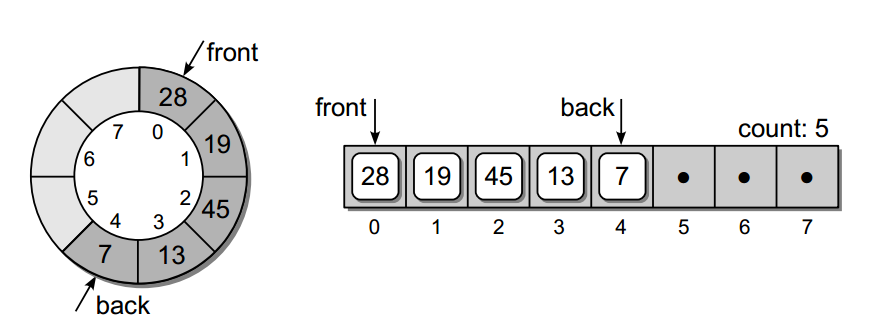

New items are added to the queue by inserting them in the position immedi-
ately following the back marker.

To dequeue an item, the value in the element marked by front will be returned
and the marker is advanced one position:

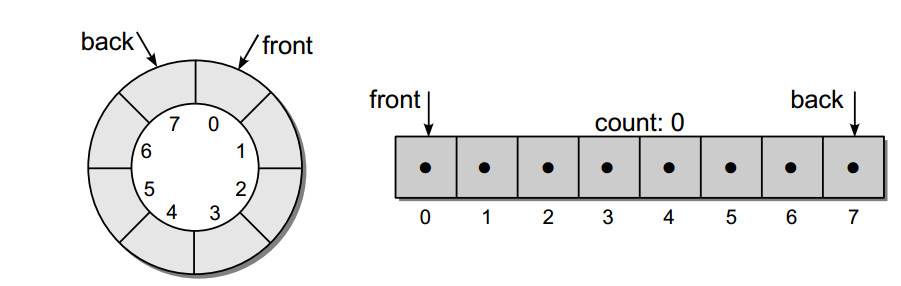


In [9]:
# Implementation of the Queue ADT using a circular array.
from array import Array 
class Queue :
    # Creates an empty queue.
    def __init__( self, maxSize ) :
        self._count = 0
        self._front = 0
        self._back = maxSize - 1
        self._qArray = Array( maxSize )

    # Returns True if the queue is empty.
    def isEmpty( self ) :
        return self._count == 0

    # Returns True if the queue is full.
    def isFull( self ) :
        return self._count == len(self._qArray)

    # Returns the number of items in the queue.
    def __len__( self ) :
        return self._count

    # Adds the given item to the queue.
    def enqueue( self, item ):
        assert not self.isFull(), "Cannot enqueue to a full queue."
        maxSize = len(self._qArray)
        self._back = (self._back + 1) % maxSize
        self._qArray[self._back] = item
        self._count += 1

    # Removes and returns the first item in the queue.
    def dequeue( self ):
        assert not self.isEmpty(), "Cannot dequeue from an empty queue."
        item = self._qArray[ self._front ]
        maxSize = len(self._qArray)
        self._front = (self._front + 1) % maxSize
        self._count -= 1
        return item


ImportError: cannot import name 'Array' from 'array' (unknown location)

# Implementation using a linked list

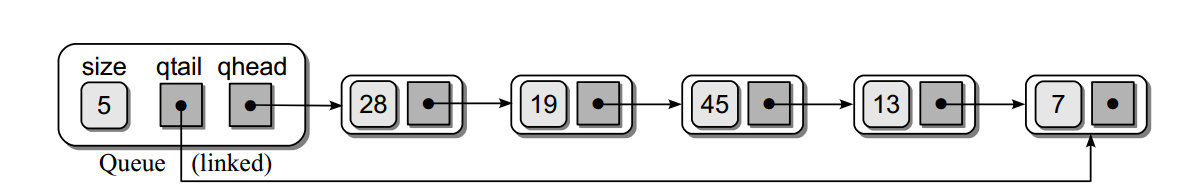

In [12]:
# Implementation of the Queue ADT using a linked list.
class Queue :
    # Creates an empty queue.
    def __init__( self ):
        self._qhead = None
        self._qtail = None
        self._count = 0 
    
    # Returns True if the queue is empty.
    def isEmpty( self ):
        return self._qhead is None

    # Returns the number of items in the queue.
    def __len__( self ):
        return self._count

    # Adds the given item to the queue.
    def enqueue( self, item ):
        node = _QueueNode( item )
        if self.isEmpty() :
            self._qhead = node
        else :
            self._qtail.next = node

        self._qtail = node
        self._count += 1

    # Removes and returns the first item in the queue.
    def dequeue( self ):
        assert not self.isEmpty(), "Cannot dequeue from an empty queue."
        node = self._qhead
        if self._qhead is self._qtail :
            self._qtail = None
        
        self._qhead = self._qhead.next
        self._count -= 1
        return node.item

 # Private storage class for creating the linked list nodes.
class _QueueNode( object ):
    def __init__( self, item ):
        self.item = item
        self.next = None



NameError: name 'self' is not defined

SyntaxError: invalid syntax (3752445294.py, line 2)

# Priority queues
Some applications require the use of a queue in which items are assigned a priority
and the items with a higher priority are dequeued first. However, all items with
the same priority still obey the FIFO principle.

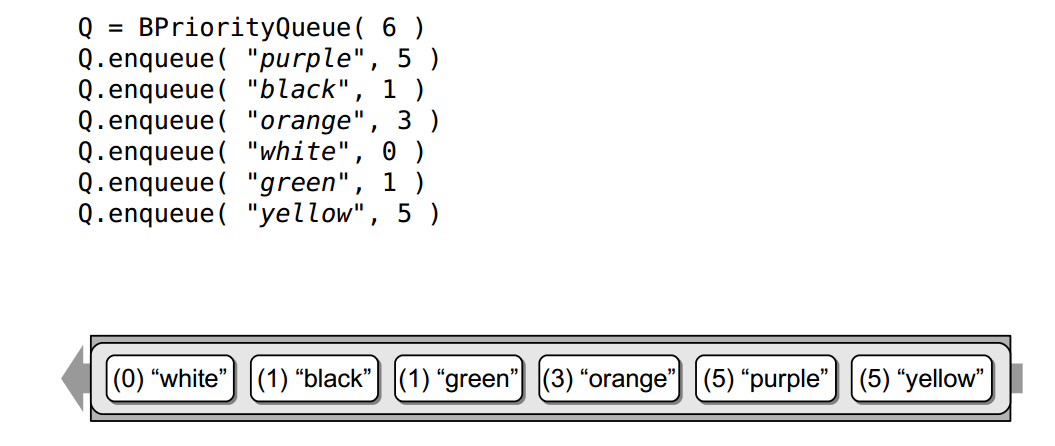

The result of dequeueing
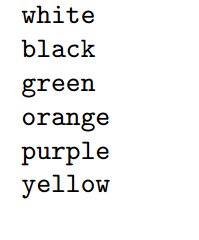

In [8]:
# Implementation of the unbounded Priority Queue ADT using a Python list
 # with new items appended to the end.
class PriorityQueue :
    # Create an empty unbounded priority queue.
    def __init__( self ):
        self._qList = list() 
    
    # Returns True if the queue is empty.
    def isEmpty( self ):
        return len( self ) == 0

    # Returns the number of items in the queue.
    def __len__( self ):
        return len( self._qList )

    # Adds the given item to the queue.
    def enqueue( self, item, priority ):
        # Create a new instance of the storage class and append it to the list.
        entry = _PriorityQEntry( item, priority )
        self._qList.append( entry )

    # Removes and returns the first item in the queue.
    def dequeue( self ) :
        assert not self.isEmpty(), "Cannot dequeue from an empty queue."

        # Find the entry with the highest priority.
        i=0
        highest_index=0
        highest = self._qList[i].priority
        for i in range( len(self) ) :
            # See if the ith entry contains a higher priority (smaller integer).
            if self._qList[i].priority < highest :
                highest = self._qList[i].priority
                highest_index=i

        # Remove the entry with the highest priority and return the item.
        entry = self._qList.pop( highest_index )
        return entry.item

 # Private storage class for associating queue items with their priority.
class _PriorityQEntry( object ):
    def __init__( self, item, priority ):
        self.item = item
        self.priority = priority

In [9]:
Q=PriorityQueue()
Q.enqueue("A", 5)
Q.enqueue("B", 3)
Q.enqueue("C", 0)

while not Q.isEmpty():
    print(Q.dequeue())

C
B
A


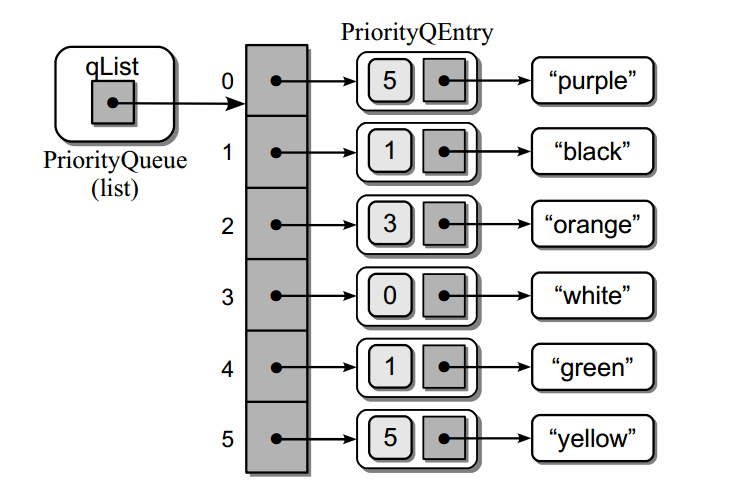

## Implementing the priority queue using the linked list

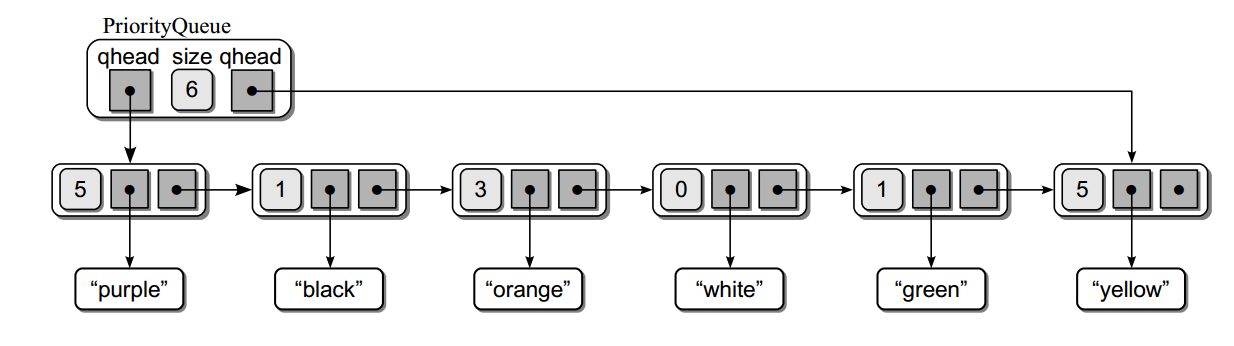

Implementation as an array of queues

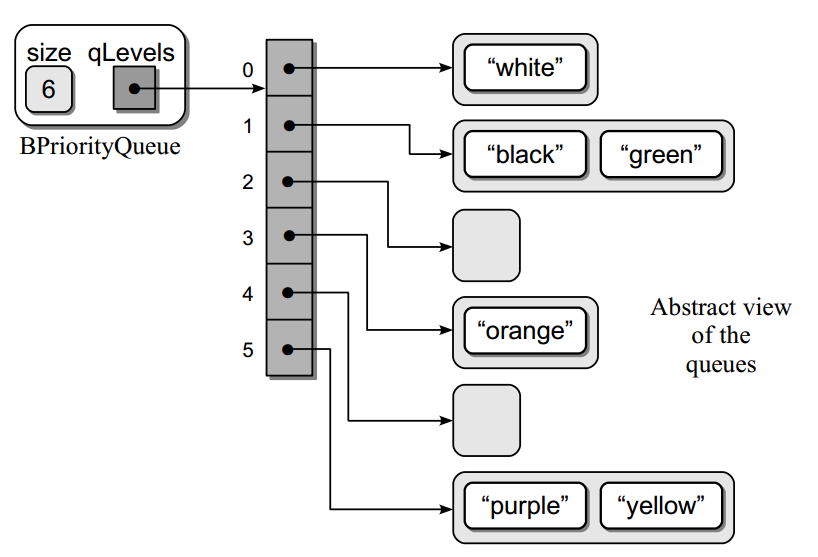

In [10]:
# Implementation of the bounded Priority Queue ADT using an array of
# queues in which the queues are implemented using a linked list.
from array import Array
#from llistqueue import Queue 
class BPriorityQueue :
    # Creates an empty bounded priority queue.
    def __init__( self, numLevels ):
        self._qSize = 0
        self._qLevels = Array( numLevels )
        for i in range( numLevels ) :
            self._qLevels[i] = Queue()

    # Returns True if the queue is empty.
    def isEmpty( self ):
        return  self._qSize==0 #len( self ) == 0

    # Returns the number of items in the queue.
    def __len__( self ):
        return len( self._qSize )

    # Adds the given item to the queue.
    def enqueue( self, item, priority ):
        assert priority >= 0 and priority < len(self._qLevels), \
        "Invalid priority level."
        self._qLevels[priority].enqueue( item )
        self._qSize+=1

    # Removes and returns the next item in the queue.
    def dequeue( self ) :
        # Make sure the queue is not empty.
        assert not self.isEmpty(), "Cannot dequeue from an empty queue."
        # Find the first non-empty queue.
        i = 0
        p = len(self._qLevels)
        while i < p and not self._qLevels[i].isEmpty() :
            i += 1
            # We know the queue is not empty, so dequeue from the ith queue.
        self._qSize-=1
        return self._qLevels[i].dequeue()

ImportError: cannot import name 'Array' from 'array' (unknown location)

# Simulating an airline ticket counter

 The length of the simulation given in number of time units. The simulation
typically begins at time unit zero.
 The number of servers providing the service to the customers. We must have
at least one server.
 The expected service time to complete a transaction.
 The distribution of arrival times, which is used to determine when customers
arrive.


Rule 1: If a customer arrives, he is added to the queue. At most, one customer
can arrive during each time step.
Rule 2: If there are customers waiting, for each free server, the next customer in
line begins her transaction.
Rule 3: For each server handling a transaction, if the transaction is complete, the
customer departs and the server becomes free.

In [11]:
# Used to store and manage information related to an airline passenger.
class Passenger :
    # Creates a passenger object.
    def __init__( self, idNum, arrivalTime ):
        self._idNum = idNum
        self._arrivalTime = arrivalTime 
    
    # Gets the passenger's id number.
    def idNum( self ) :
        return self._idNum

    # Gets the passenger's arrival time.
    def timeArrived( self ) :
        return self._arrivalTime


In [16]:
# Used to store and manage information related to an airline ticket agent.
class TicketAgent :
    # Creates a ticket agent object.
    def __init__( self, idNum ):
        self._idNum = idNum
        self._passenger = None
        self._stopTime = -1 
    # Gets the ticket agent's id number.
    def idNum( self ):
        return self._idNum

    # Determines if the ticket agent is free to assist a passenger.
    def isFree( self ):
        return self._passenger is None

    # Determines if the ticket agent has finished helping the passenger.
    def isFinished( self, curTime ):
        return self._passenger is not None and self._stopTime == curTime

    # Indicates the ticket agent has begun assisting a passenger.
    def startService( self, passenger, stopTime ):
        self._passenger = passenger
        self._stopTime = stopTime

    # Indicates the ticket agent has finished helping the passenger.
    def stopService( self ):
        thePassenger = self._passenger
        self._passenger = None
        return thePassenger


In [1]:
# Implementation of the main simulation class.
from array import Array
#from llistqueue import Queue
#from people import TicketAgent, Passenger
class TicketCounterSimulation :
    # Create a simulation object.
    def __init__( self, numAgents, numMinutes, betweenTime, serviceTime ):
        # Parameters supplied by the user.
        self._betweenTime=betweenTime
        self._arriveProb = 1.0 / betweenTime
        self._serviceTime = serviceTime
        self._numMinutes = numMinutes


        # Simulation components.
        self._passengerQ = Queue()
        self._theAgents = Array( numAgents )
        for i in range( numAgents ) :
            self._theAgents[i] = TicketAgent(i+1)

        # Computed during the simulation.
        self._totalWaitTime = 0
        self._numPassengers = 0

    # Run the simulation using the parameters supplied earlier.
    def run( self ):
        for curTime in range(self._numMinutes + 1) :
            if not self._passengerQ.isEmpty():
                self._totalWaitTime+=1
            self._handleArrival( curTime )
            self._handleBeginService( curTime )
            self._handleEndService( curTime )
            self.printResults()

    # Print the simulation results.
    def printResults( self ):
        numServed = self._numPassengers - len(self._passengerQ)
        avgWait = float( self._totalWaitTime ) / numServed
        print( "" )
        print( "Number of passengers served = ", numServed )
        print( "Number of passengers remaining in line = %d" %
        len(self._passengerQ) )
        print( "The average wait time was %4.2f minutes." % avgWait )

    # The remaining methods that have yet to be implemented.
    def _handleArrive(self, curTime ): # Handles simulation rule #1.
        #We generate a random number in range(minutesBetween)
        from numpy import randn
        minutesBetween= self._betweenTime #1/self._arriveProb
        randnum=randn(1, minutesBetween)[0]
        
        
        if randnum % minutesBetween==0:
            newCustomer=Passenger(self._numPassengers,  curTime)
            self._passengerQ.enqueue(newCustomer)
            self._numPassengers+=1

           

    def _handleBeginService(self, curTime ): # Handles simulation rule #2.
        for i, agent in enumerate(self._theAgents):
            #if agent.isFinished(curTime):
            #    agent.stopService()
            if agent.isFree():
                if not self._passengerQ.isEmpty():
                    passenger=self._passengerQ.dequeue()
                    agent.startService(passenger, curTime+ self._serviceTime )
            
    
    def _handleEndService(self, curTime ): # Handles simulation rule #3.
        for i, agent in enumerate(self._theAgents):
            if agent.isFinished(curTime):
                agent.stopService()

ImportError: cannot import name 'Array' from 'array' (unknown location)